# Instructions
- You can run the program by simply running all the cells
    - Note: Before running the last two plotting cells, please run our Java algorithm and paste the output runtimes into the tValsJ array
- The last few cells will be used to plot the results of the algorithm's runtime against the Java version and other curves
    - Note that we will have one cell that uses preset run data from one of our machines to compare the Java and Python runtimes. Feel free to paste in the runtime data for both algorithms after you run them into the arrays as we have formatted

## Imports

In [1]:
import re
import csv
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

## Define Functions

In [2]:
# function used to read a csv into a key value data structure
def read_csv_to_dict(filename):
    result_dict = {}
    with open(filename, newline='') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            key = row[0]
            values = row[1:]
            result_dict[key] = values
    return result_dict

In [3]:
# main algorithm to remove all abbreviations in an input string, and replace it with the appropriate translation
def translate_text(text, translations):
    # find all words in input string
    words = re.findall(r'\w+', text)
    for word in words:
        # if the word matches an abbreviation
        if word.lower() in translations:
            translation = translations[word.lower()]
            # if the translation has more than one possible translation
            if isinstance(translation, list):
                translation = ' '.join(translation)
            # replace all occurrences of the abbreviation with the translation
            text = re.sub(r'\b%s\b' % word, translation, text, flags=re.IGNORECASE)
    # remove leading and trailing spaces
    return text.strip()

In [4]:
# helper function to run our algorithm on N lines from the dataset
def run_N_times(data, N):
    out = []
    for x in range(N):
        text = data[x]
        out.append(translate_text(text, abbr))
    return out

## Read In Datasets

In [5]:
abbr = read_csv_to_dict("data/processed_abbreviations.csv")
dsReviews = pd.read_csv('content.csv').iloc[:, 0].tolist()

## Main Function
- Function will have multiple runs, with increasing input sizes
- After the first 50001 lines have been checked, it will write a csv with those translated outputs (feel free to look through it and verify the accuracy)
- After all runs have been completed, we will print the runtime and input size values to this notebook, which will then be used when plotting the runtime graphs

In [6]:
tVals = []
nVals = []
runData = []
N = 1
i = 0
maxN = len(dsReviews)+1

while N < maxN:
    runData = []
    nVals.append(N)
    start = time.perf_counter()
    runData.append(run_N_times(dsReviews, N-1))
    end = time.perf_counter()
    tVals.append((end-start)*1000)
    i+=1
    N+= 50000
    if N == 100001:
        pd.DataFrame(runData).to_csv('output.csv')
print('Time: ', tVals)
print('N: ', nVals)

Time:  [0.001499999996212864, 456.83640000000025, 997.7037000000024, 1473.5054000000005, 1926.6721999999986, 2416.6657000000027, 2938.3178000000003, 3287.2229999999972, 3827.1656000000007, 4305.7311999999965, 4640.615600000004, 5012.924299999994, 5508.628400000006, 5917.325300000001, 6480.523199999993, 6944.725599999998, 7391.327200000006, 7723.860000000002, 8010.7815999999875, 8409.981099999983, 8646.742399999994, 9262.859800000002, 9654.369599999995, 9920.813699999997, 10352.841300000022, 10812.196599999992, 11102.1365, 11416.933999999997]
N:  [1, 50001, 100001, 150001, 200001, 250001, 300001, 350001, 400001, 450001, 500001, 550001, 600001, 650001, 700001, 750001, 800001, 850001, 900001, 950001, 1000001, 1050001, 1100001, 1150001, 1200001, 1250001, 1300001, 1350001]


## Plots

### Python Algorithm Vs. O(n<sup>0.68</sup>) and O(n<sup>0.64</sup>)

<ipython-input-17-345e7329ef39>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values])


[Text(-200000.0, 0, '-200000'),
 Text(0.0, 0, '0'),
 Text(200000.0, 0, '200000'),
 Text(400000.0, 0, '400000'),
 Text(600000.0, 0, '600000'),
 Text(800000.0, 0, '800000'),
 Text(1000000.0, 0, '1000000'),
 Text(1200000.0, 0, '1200000'),
 Text(1400000.0, 0, '1400000'),
 Text(1600000.0, 0, '1600000')]

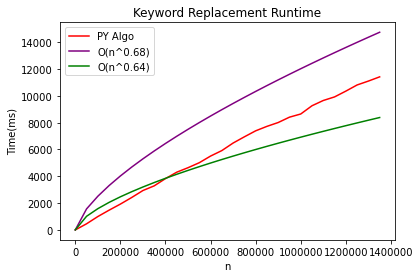

In [17]:
plt.plot(nVals, tVals, color="red", label="PY Algo")
if True:
    plt.plot(nVals ,[n**0.68 for n in nVals], color="purple", label="O(n^0.68)")
    plt.plot(nVals ,[n**0.64 for n in nVals], color="green", label="O(n^0.64)")
plt.xlabel("n")
plt.ylabel("Time(ms)")
plt.legend()
plt.title("Keyword Replacement Runtime")
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values])

### Java Algorithm Vs. O(n<sup>0.63</sup>) and O(n<sup>0.59</sup>)

<ipython-input-24-df9e1d33850a>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_valuesJ])


[Text(-200000.0, 0, '-200000'),
 Text(0.0, 0, '0'),
 Text(200000.0, 0, '200000'),
 Text(400000.0, 0, '400000'),
 Text(600000.0, 0, '600000'),
 Text(800000.0, 0, '800000'),
 Text(1000000.0, 0, '1000000'),
 Text(1200000.0, 0, '1200000'),
 Text(1400000.0, 0, '1400000'),
 Text(1600000.0, 0, '1600000')]

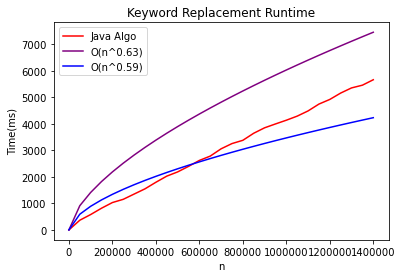

In [24]:
# The values here are pasted in from the console output of the Java algorithm
nValsJ = [1, 50001, 100001, 150001, 200001, 250001, 300001, 350001, 400001, 450001, 500001, 550001, 600001, 650001, 700001, 750001, 800001, 850001, 900001, 950001, 1000001, 1050001, 1100001, 1150001, 1200001, 1250001, 1300001, 1350001, 1400001]
tValsJ = [1, 366, 580, 819, 1032, 1154, 1352, 1549, 1796, 2027, 2186, 2394, 2619, 2782, 3057, 3254, 3377, 3643, 3848, 3993, 4134, 4288, 4484, 4742, 4917, 5157, 5351, 5454, 5659]
plt.plot(nValsJ, tValsJ, color="red", label="Java Algo")
if True:
    plt.plot(nValsJ ,[n**0.63 for n in nValsJ], color="purple", label="O(n^0.63)")
    plt.plot(nValsJ ,[n**0.59 for n in nValsJ], color="blue", label="O(n^0.59)")
plt.xlabel("n")
plt.ylabel("Time(ms)")
plt.legend()
plt.title("Keyword Replacement Runtime")
current_valuesJ = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_valuesJ])

### Python Algorithm Vs. Java Algorithm

<ipython-input-26-a325e5c819a8>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_valuesJ])


[Text(-200000.0, 0, '-200000'),
 Text(0.0, 0, '0'),
 Text(200000.0, 0, '200000'),
 Text(400000.0, 0, '400000'),
 Text(600000.0, 0, '600000'),
 Text(800000.0, 0, '800000'),
 Text(1000000.0, 0, '1000000'),
 Text(1200000.0, 0, '1200000'),
 Text(1400000.0, 0, '1400000'),
 Text(1600000.0, 0, '1600000')]

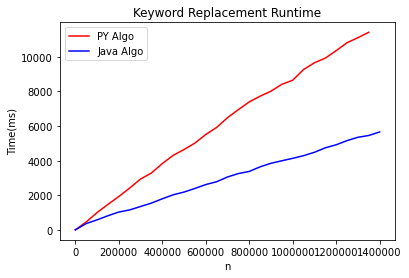

In [26]:
plt.plot(nVals, tVals, color="red", label="PY Algo")
plt.plot(nValsJ, tValsJ, color="blue", label="Java Algo")
plt.xlabel("n")
plt.ylabel("Time(ms)")
plt.legend()
plt.title("Keyword Replacement Runtime")
current_valuesJ = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_valuesJ])